In [155]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [156]:
stock_list = [3.5, 5, 2, 8, 4.2]

In [64]:
returns = np.array(stock_list)
print(returns)
type(returns)

[3.5 5.  2.  8.  4.2]


numpy.ndarray

In [65]:
returns.shape

(5,)

In [66]:
print(np.log(returns))

[1.25276297 1.60943791 0.69314718 2.07944154 1.43508453]


In [67]:
print ("Mean: ", np.mean(returns), "Std Dev: ", np.std(returns))

Mean:  4.54 Std Dev:  1.9915822855207364


In [68]:
# simulate a universe of stocks using NumPy's functions. 
# first create the arrays to hold the assets and returns that will use to build a portfolio. 

N = 10
assets = np.zeros((N, 100))
returns = np.zeros((N, 100))

In [69]:
# Sample 100 points with a mean of 0 and an std of 1. This is a standard normal distribution.

X = np.random.normal(0, 1, 100)

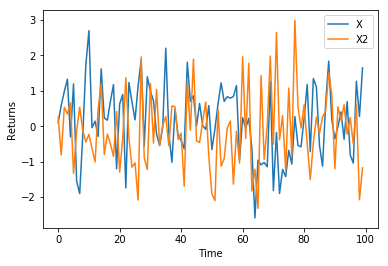

In [157]:
X = np.random.normal(0, 1, 100)
X2 = np.random.normal(0, 1, 100)

plt.plot(X);
plt.plot(X2);
plt.xlabel('Time') # The data we generated is unitless, but don't forget units in general.
plt.ylabel('Returns')
plt.legend(['X', 'X2']);

In [162]:
# Take the average of the last 60 days at each timepoint.

MAVG = X.rolling(X, window=60).mean()
plt.plot(X.index, X.values)
plt.plot(MAVG.index, MAVG.values)
plt.ylabel('Price')
plt.legend(['MSFT', '60-day MAVG']);

AttributeError: 'numpy.ndarray' object has no attribute 'rolling'

In [169]:
pd.rolling.mean?

Object `pd.rolling.mean` not found.


In [70]:
X

array([ 0.66103602,  0.22330959,  1.10476451,  1.60315246, -0.74692615,
       -0.80898643, -0.53185682,  0.09630412, -1.42779148,  1.25311395,
       -1.19282223,  0.34969294,  1.34095459,  0.20309436, -2.55295929,
        0.80450426,  0.65781242,  1.43572547, -0.39455456, -1.03216572,
       -0.36016107,  0.21408651, -1.13665363, -2.53927217, -0.06881549,
        0.60098567, -0.41686812,  0.31226321,  0.79732569, -0.95750628,
       -1.95340884,  0.20428074, -0.7059187 , -0.60105073, -0.07516388,
        0.27208041, -1.40007574, -0.59146701,  0.23974973, -0.00422318,
        0.75433291, -1.71893607, -0.79725055,  0.29839175, -1.05118885,
        0.2497346 , -0.4034287 , -0.23021278,  0.84971254, -1.04764335,
       -0.4742766 ,  1.26833521, -0.65852732, -2.63983882,  0.844665  ,
        0.35385301,  0.67287264,  0.03025617, -0.19629372,  0.62462996,
        0.54753428, -1.11813566, -1.00872609, -0.39614489,  1.13285382,
        1.03918282, -0.72481835, -1.5497373 ,  0.5464902 , -0.51

Now we will simulate a base asset. 
We want the universe of stocks to be correlated with each other,
so we will use this initial value to generate the others.


In [95]:
# draw 𝑁=100 random samples from a normal distribution with mean=1.01 and std=0.03
R_1 = np.random.normal(1.01, 0.03, 100)
returns[0] = R_1
assets[0] = np.cumprod(R_1)


In [96]:
# np.cumprod(a,axis=None, dtype=None, out=None)
# by default no axis is used, the input is flattened
# take an input array a and return the cumulative product of elements along a given axis.

In [97]:
a = np.array([1,2,3])
np.cumprod(a)

array([1, 2, 6])

In [98]:
a = np.array([[1, 2, 3], [4, 5, 6]])
np.cumprod(a, dtype=float)

array([  1.,   2.,   6.,  24., 120., 720.])

In [99]:
a

array([[1, 2, 3],
       [4, 5, 6]])

In [100]:
np.cumprod(a,axis=0)

array([[ 1,  2,  3],
       [ 4, 10, 18]])

In [78]:
np.cumprod(a,axis=1)

array([[  1,   2,   6],
       [  4,  20, 120]])

In [79]:
R_1

array([1.00122675, 1.02179492, 1.01018393, 0.96690005, 1.02945395,
       1.01041602, 1.02252412, 1.03276643, 0.99776528, 0.97929521,
       0.98421845, 1.09883031, 0.99087696, 0.97315579, 1.02107075,
       1.03059212, 1.00607296, 1.02749049, 0.9840096 , 1.03490867,
       1.0180566 , 1.01346277, 1.00504402, 1.03590589, 1.01482606,
       1.01956991, 1.01835765, 0.99476104, 1.01603294, 1.04810503,
       1.05040722, 1.02919573, 1.02082974, 0.98232223, 0.98406234,
       0.96636758, 1.03893516, 1.00577334, 1.05005089, 1.01528488,
       1.03942775, 1.00398889, 0.94313046, 0.97670411, 0.98576171,
       0.98065229, 0.97990677, 0.99814476, 1.00058893, 0.98625465,
       1.01807554, 1.02893729, 1.04675263, 1.06441648, 0.99431419,
       0.92625242, 1.06907041, 0.99234213, 1.02283181, 1.03585167,
       1.03414302, 0.97992146, 0.98743135, 0.99197857, 0.99192834,
       1.05402128, 1.05892427, 0.98347671, 0.98247314, 1.02589843,
       1.02862285, 0.99729444, 0.98727864, 0.99366518, 1.06844

the individual 𝑅𝑖 vectors are each 1-dimensional arrays 
and the returns and assets variables contain 2-dimensional arrays.

set the initial row of both returns and assets to be the first 𝑅𝑖 vector 
and the cumulative asset price based on those returns, respectively.

#### generate the remaining 𝑁−1 securities by adding random noise to 𝑅1, to ensure that 𝑁−1 assets will be correlated with the base asset

In [81]:
# Generate assets that are correlated with R_1

for i in range(1, N):
    R_i = R_1 + np.random.normal(0.001, 0.02, 100)
    returns[i] = R_i # Set each row of returns equal to the new R_i array
    assets[i] = np.cumprod(R_i)
    
mean_returns = [(np.mean(R) - 1)*100 for R in returns]
return_volatilities = [np.std(R) for R in returns]


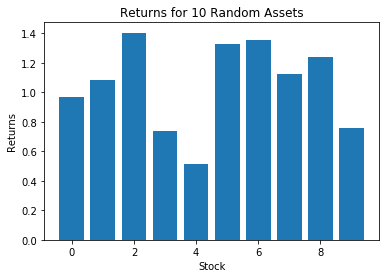

In [87]:
# plot the mean return of each asset
# bar is a function of pyplot

plt.bar(np.arange(len(mean_returns)), mean_returns)
plt.xlabel('Stock')
plt.ylabel('Returns')
plt.title('Returns for {0} Random Assets'.format(N));


In [ ]:
# generating 𝑁 random weights for each asset in the portfolio
weights = np.random.uniform(0, 1, N)

In [88]:
# rescale the weights so that they all add up to  1
weights = weights/np.sum(weights)

In [89]:
weights

array([1.57215630e-01, 1.18808800e-01, 1.37255573e-01, 5.99376216e-02,
       1.29692925e-01, 1.77069919e-04, 1.00514941e-01, 1.08284814e-02,
       1.80483738e-01, 1.05085220e-01])

### calculate the mean return of the portfolio, taking each asset's return by its designated weight. 
### use dot() on one-dimensional vector to multiply each element pointwise and add all the products together

# 𝜔⋅𝜇 = 𝜔1𝜇1 + 𝜔2𝜇2 + ⋯ + 𝜔𝑁𝜇𝑁 = 𝜇𝑃


In [147]:
p_returns = np.dot(weights, mean_returns)
print("Expected return of the portfolio: ", p_returns)

Expected return of the portfolio:  1.0358299985847896


calculate the variance of the portfolio, 
as a sum of each individual asset, scaled by its weight


Where  𝑆0,⋯,𝑆𝑁  are the assets contained within our universe

$$VAR[P] = VAR[\omega_1 S_1 + \omega_2 S_2 + \cdots + \omega_N S_N]$$

If all of assets were independent of each other, we could simply evaluate as

$$VAR[P] = VAR[\omega_1 S_1] + VAR[\omega_2 S_2] + \cdots + VAR[\omega_N S_N] = \omega_1^2\sigma_1^2 + \omega_2^2\sigma_2^2 + \cdots + \omega_N^2\sigma_N^2$$


However, all of assets are related to each other; 
the variance has to include the individual pairwise covariances of each asset

$$VAR[P] = \sigma_P^2 = \sum_i \omega_i^2\sigma_i^2 + \sum_i\sum_{i\neq j} \omega_i\omega_j\sigma_i\sigma_j\rho_{i, j}, \ i, j \in \lbrace 1, 2, \cdots, N \rbrace$$

Where 𝜌𝑖,𝑗 is the correlation between 𝑆𝑖 and 𝑆𝑗, 𝜌𝑖,𝑗= 𝐶𝑂𝑉(𝑆𝑖,𝑆𝑗)/𝜎𝑖𝜎𝑗 

### calculate the covariance matrix that relates all the individual assets

In [148]:
cov_mat = np.cov(returns)
print (cov_mat)

[[ 1.00960053e-03  6.03547993e-05  1.20531577e-04  6.63931252e-05
   1.37153013e-05  5.94873265e-05  6.53249368e-05  1.18018851e-04
   9.01271058e-05 -1.73119878e-05]
 [ 6.03547993e-05  1.20612055e-03  7.46819839e-04  7.34898153e-04
   8.46379221e-04  8.60853586e-04  7.48221378e-04  8.03565023e-04
   9.00412934e-04  7.31148081e-04]
 [ 1.20531577e-04  7.46819839e-04  1.12688269e-03  7.79899488e-04
   7.61664535e-04  8.26399142e-04  7.05267769e-04  7.93731512e-04
   8.58996325e-04  7.39460458e-04]
 [ 6.63931252e-05  7.34898153e-04  7.79899488e-04  1.10888515e-03
   7.45213228e-04  7.75097872e-04  6.49072427e-04  7.52578450e-04
   8.79495949e-04  7.50643071e-04]
 [ 1.37153013e-05  8.46379221e-04  7.61664535e-04  7.45213228e-04
   1.11781588e-03  8.77745729e-04  6.87563548e-04  7.52687036e-04
   8.28648257e-04  7.46641365e-04]
 [ 5.94873265e-05  8.60853586e-04  8.26399142e-04  7.75097872e-04
   8.77745729e-04  1.18428667e-03  7.18066258e-04  8.77525220e-04
   8.90557652e-04  7.68019638e-04

The 𝑁×𝑁 covariance matrix is of the form:

$$ \left[\begin{matrix}
VAR[S_1] & COV[S_1, S_2] & \cdots & COV[S_1, S_N] \\
COV[S_2, S_1] & VAR[S_2] & \cdots & COV[S_2, S_N] \\
\vdots & \vdots & \ddots & \vdots \\
COV[S_N, S_1] & COV[S_N, S_2] & \cdots & VAR[S_N]
\end{matrix}\right] $$

each diagonal entry is the variance of that asset at that index 
and each off-diagonal holds the covariance of two assets indexed by the column and row number.

using the covariance matrix to calculate the variance as

$$\sigma_p^2 = \omega \ C \ \omega^\intercal$$

Where  𝐶  is the covariance matrix of all the assets and  𝜔  is the array containing the weights of each individual asset. The superscript  ⊺  on the second  𝜔  listed above denotes the transpose of  𝜔 . 

 𝜔 is 1×𝑁 1-d horizontal array, so 𝜔⊺ is N×1 1-d vertical array.

## Dimensions(𝜎2 𝑝) = Dimensions(𝜔 𝐶 𝜔⊺) = (1×𝑁)⋅(𝑁×𝑁)⋅(𝑁×1)=(1×1)

In [149]:
# Calculating the portfolio volatility

var_p = np.dot(np.dot(weights, cov_mat), weights.T)
vol_p = np.sqrt(var_p)
print ("Portfolio volatility: ", vol_p)

Portfolio volatility:  0.025216516758167693


In [150]:
# Confirming calculation
vol_p_alt = np.sqrt(np.var(np.dot(weights, returns), ddof=1))
print ("Portfolio volatility: ", vol_p_alt)

Portfolio volatility:  0.025216516758167697


The ddof parameter is a simple integer input that tells the function the number of degrees of freedom to take into account. This is a more statistical concept, but what this tells us that our matrix calculation is correct!